In [2]:
import numpy
import kagglehub

# Download latest version
relative_path = "malaiarasugraj/global-health-statistics"
path = kagglehub.dataset_download(relative_path)
print("Path to dataset files:", path)

Path to dataset files: /home/zarathustra/.cache/kagglehub/datasets/malaiarasugraj/global-health-statistics/versions/1


In [3]:
import pandas as pd
import os
file_names = files = os.listdir(path)
file_name=file_names[0]

# Method 1: Using os.name
if os.name == 'nt':  # Windows
    df = pd.read_csv(path+"\\"+file_name)
else:  # Linux/Mac
    df = pd.read_csv(path+"/"+file_name)

print("Datenvorschau:")
print(df.head())  # Zeigt die ersten 5 Zeilen der CSV-Datei

Datenvorschau:
     Country  Year         Disease Name Disease Category  Prevalence Rate (%)  \
0      Italy  2013              Malaria      Respiratory                 0.95   
1     France  2002                Ebola        Parasitic                12.46   
2     Turkey  2015             COVID-19          Genetic                 0.91   
3  Indonesia  2011  Parkinson's Disease       Autoimmune                 4.68   
4      Italy  2013         Tuberculosis          Genetic                 0.83   

   Incidence Rate (%)  Mortality Rate (%) Age Group Gender  \
0                1.55                8.42      0-18   Male   
1                8.63                8.75       61+   Male   
2                2.35                6.22     36-60   Male   
3                6.29                3.99      0-18  Other   
4               13.59                7.01       61+   Male   

   Population Affected  ...  Hospital Beds per 1000  Treatment Type  \
0               471007  ...                    7.58   

In [4]:
#Reconfigure Data
column_names = df.columns.tolist()
print("Column names:", column_names)
print(column_names[12])

Column names: ['Country', 'Year', 'Disease Name', 'Disease Category', 'Prevalence Rate (%)', 'Incidence Rate (%)', 'Mortality Rate (%)', 'Age Group', 'Gender', 'Population Affected', 'Healthcare Access (%)', 'Doctors per 1000', 'Hospital Beds per 1000', 'Treatment Type', 'Average Treatment Cost (USD)', 'Availability of Vaccines/Treatment', 'Recovery Rate (%)', 'DALYs', 'Improvement in 5 Years (%)', 'Per Capita Income (USD)', 'Education Index', 'Urbanization Rate (%)']
Hospital Beds per 1000


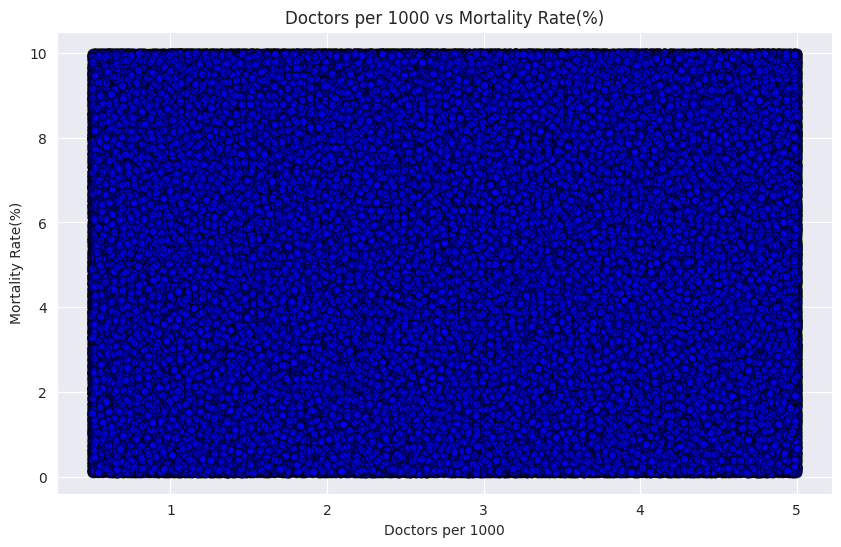

In [5]:
#svm
import sklearn
import matplotlib.pyplot as plt
import numpy as np

# Plotting the scatter plot for 'Doctors per 1000' vs 'Mortality Rate(%)'
plt.figure(figsize=(10, 6))
plt.scatter(df[column_names[11]], df[column_names[6]], alpha=0.5, color='blue', edgecolor='k')

# Adding labels and title
plt.xlabel('Doctors per 1000')
plt.ylabel('Mortality Rate(%)')
plt.title('Doctors per 1000 vs Mortality Rate(%)')

plt.show()

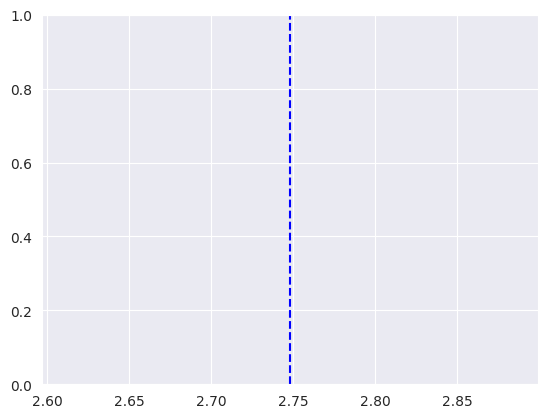

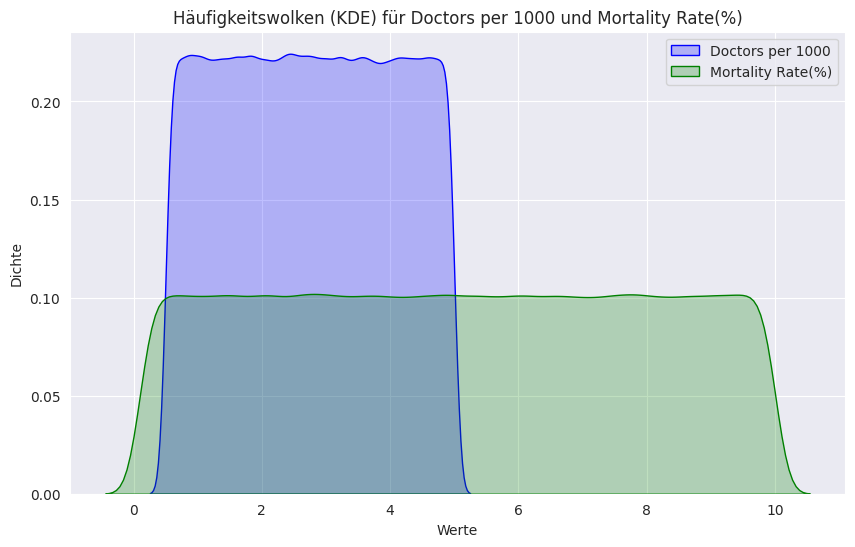

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Berechnen der Standardabweichung
durchschnitt_doctors= np.mean(df[column_names[11]])
durchschnitt_mortality= np.mean(df[column_names[6]])
std_dev_doctors = np.std(df[column_names[11]])  # Standardabweichung für 'Doctors per 1000'
std_dev_mortality = np.std(df[column_names[6]])  # Standardabweichung für 'Mortality Rate(%)'



# KDE Plot für Häufigkeitswolken (Density Plot)
# Hinzufügen der Mittelwertslinien
plt.axvline(durchschnitt_doctors, color='blue', linestyle='--', label=f'Mittelwert Doctors per 1000: {durchschnitt_doctors:.2f}')

plt.figure(figsize=(10, 6))
sns.kdeplot(df[column_names[11]], fill=True, color='blue', label='Doctors per 1000')
sns.kdeplot(df[column_names[6]], fill=True, color='green', label='Mortality Rate(%)')

plt.title('Häufigkeitswolken (KDE) für Doctors per 1000 und Mortality Rate(%)')
plt.xlabel('Werte')
plt.ylabel('Dichte')
plt.legend()

plt.show()


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

print(durchschnitt_mortality)
print(std_dev_mortality)
X=df[[column_names[11],column_names[12]]]
y=df[column_names[6]]
# Datenaufteilung
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modellinitialisierung
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Modelltraining
model.fit(X_train, y_train)

# Vorhersagen
y_pred = model.predict(X_test)

# Modellbewertung
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')


5.049918859999999
2.8594250995639485
Mean Squared Error: 10.943055436090443
Root Mean Squared Error: 3.3080289351954653


In [8]:
print(durchschnitt_mortality)
print(std_dev_mortality)
X=df[[column_names[9], column_names[10],column_names[11],column_names[12]]]
y=df[column_names[6]]
# Datenaufteilung
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=48)

# Modellinitialisierung
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Modelltraining
model.fit(X_train, y_train)

# Vorhersagen
y_pred = model.predict(X_test)

# Modellbewertung
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')


5.049918859999999
2.8594250995639485
Mean Squared Error: 8.5304468434566
Root Mean Squared Error: 2.920692870443005


In [9]:
'''
import numpy as np
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

# Scale input features and outputs to [0, 1]
input_scaler = MinMaxScaler()
output_scaler = MinMaxScaler()

# Fit output scaler on target variable
#y_train_scaled = output_scaler.fit_transform(y_train.reshape(-1, 1)).ravel()
y_train_scaled = output_scaler.fit_transform(y_train.to_numpy().reshape(-1, 1)).ravel()


# Create an SVR model with RBF kernel
svr = SVR(kernel='rbf', C=1.0, epsilon=0.1)

# Combine preprocessing and model into a pipeline
model = make_pipeline(input_scaler, svr)

# Fit the model
model.fit(X_train, y_train_scaled)

# Predict on the test set
y_pred_scaled = model.predict(X_test)

# Rescale predictions back to the original range
y_pred = output_scaler.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")
'''

'\nimport numpy as np\nfrom sklearn.svm import SVR\nfrom sklearn.preprocessing import MinMaxScaler\nfrom sklearn.pipeline import make_pipeline\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.metrics import mean_squared_error\n\n# Split data\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)\n\n# Scale input features and outputs to [0, 1]\ninput_scaler = MinMaxScaler()\noutput_scaler = MinMaxScaler()\n\n# Fit output scaler on target variable\n#y_train_scaled = output_scaler.fit_transform(y_train.reshape(-1, 1)).ravel()\ny_train_scaled = output_scaler.fit_transform(y_train.to_numpy().reshape(-1, 1)).ravel()\n\n\n# Create an SVR model with RBF kernel\nsvr = SVR(kernel=\'rbf\', C=1.0, epsilon=0.1)\n\n# Combine preprocessing and model into a pipeline\nmodel = make_pipeline(input_scaler, svr)\n\n# Fit the model\nmodel.fit(X_train, y_train_scaled)\n\n# Predict on the test set\ny_pred_scaled = model.predict(X_test)\n\n# Rescale predic

In [9]:
smaller_df  = pd.DataFrame()
print(column_names[6])
rows=[]
for _, row in df.iterrows():

    if row[column_names[6]]<abs(durchschnitt_mortality+std_dev_mortality) and row[column_names[6]]<abs(durchschnitt_mortality-std_dev_mortality):
        rows.append(row)
smaller_df = pd.concat([smaller_df, pd.DataFrame(rows)], ignore_index=True)
print(smaller_df.count())

Mortality Rate (%)
Country                               211802
Year                                  211802
Disease Name                          211802
Disease Category                      211802
Prevalence Rate (%)                   211802
Incidence Rate (%)                    211802
Mortality Rate (%)                    211802
Age Group                             211802
Gender                                211802
Population Affected                   211802
Healthcare Access (%)                 211802
Doctors per 1000                      211802
Hospital Beds per 1000                211802
Treatment Type                        211802
Average Treatment Cost (USD)          211802
Availability of Vaccines/Treatment    211802
Recovery Rate (%)                     211802
DALYs                                 211802
Improvement in 5 Years (%)            211802
Per Capita Income (USD)               211802
Education Index                       211802
Urbanization Rate (%)               

In [ ]:
even_smaller_df  = pd.DataFrame()
for entry in df:
    if entry[column_names[6]]<abs(durchschnitt_mortality+3*std_dev_mortality):
        even_smaller_df.append(entry)
print(even_smaller_df.count())

In [10]:

import numpy as np
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
X=smaller_df[[column_names[9], column_names[10],column_names[11],column_names[12]]]
y=smaller_df[column_names[6]]
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

# Scale input features and outputs to [0, 1]
input_scaler = MinMaxScaler()
output_scaler = MinMaxScaler()

# Fit output scaler on target variable
#y_train_scaled = output_scaler.fit_transform(y_train.reshape(-1, 1)).ravel()
y_train_scaled = output_scaler.fit_transform(y_train.to_numpy().reshape(-1, 1)).ravel()


# Create an SVR model with RBF kernel
svr = SVR(kernel='rbf', C=.10, epsilon=0.1)

# Combine preprocessing and model into a pipeline
model = make_pipeline(input_scaler, svr)

# Fit the model
model.fit(X_train, y_train_scaled)

# Predict on the test set
y_pred_scaled = model.predict(X_test)

# Rescale predictions back to the original range
y_pred = output_scaler.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")


Mean Squared Error: 0.3656
